<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#線形・ガウス状態空間モデル" data-toc-modified-id="線形・ガウス状態空間モデル-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>線形・ガウス状態空間モデル</a></span></li><li><span><a href="#ランダムウォーク＋ノイズモデルの状態推定" data-toc-modified-id="ランダムウォーク＋ノイズモデルの状態推定-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>ランダムウォーク＋ノイズモデルの状態推定</a></span><ul class="toc-item"><li><span><a href="#問題設定" data-toc-modified-id="問題設定-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>問題設定</a></span></li><li><span><a href="#カルマンフィルタ-（予測、フィルタ）" data-toc-modified-id="カルマンフィルタ-（予測、フィルタ）-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>カルマンフィルタ （予測、フィルタ）</a></span></li><li><span><a href="#【実装】ランダムウォーク＋ノイズモデルの観測値データ生成" data-toc-modified-id="【実装】ランダムウォーク＋ノイズモデルの観測値データ生成-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>【実装】ランダムウォーク＋ノイズモデルの観測値データ生成</a></span></li><li><span><a href="#【実装】状態推定（1期先予測、フィルタ）" data-toc-modified-id="【実装】状態推定（1期先予測、フィルタ）-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>【実装】状態推定（1期先予測、フィルタ）</a></span></li><li><span><a href="#未知パラメーターの最尤推定" data-toc-modified-id="未知パラメーターの最尤推定-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>未知パラメーターの最尤推定</a></span><ul class="toc-item"><li><span><a href="#尤度の計算" data-toc-modified-id="尤度の計算-2.5.1"><span class="toc-item-num">2.5.1&nbsp;&nbsp;</span>尤度の計算</a></span></li><li><span><a href="#【実装】尤度の計算" data-toc-modified-id="【実装】尤度の計算-2.5.2"><span class="toc-item-num">2.5.2&nbsp;&nbsp;</span>【実装】尤度の計算</a></span></li><li><span><a href="#最尤法によるパラメーター推定" data-toc-modified-id="最尤法によるパラメーター推定-2.5.3"><span class="toc-item-num">2.5.3&nbsp;&nbsp;</span>最尤法によるパラメーター推定</a></span></li></ul></li></ul></li></ul></div>

In [9]:
import sys
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from PIL import ImageGrab, Image

**観測値y(1),...,y(t)**が手元にあるデータである。<br>
ここでは例として、**観測値=ある測定器で得られた測定値**と考える。<br>
しかしこの測定値は、真の現象を完璧に捉えているものではない。<br>
空気の流れ、電磁場、ホコリ、振動等の種々の影響によって測定値は撹乱される。したがって、<br>
\begin{equation}
\bf{真の現象　と　種々のノイズの影響　から　測定値　が決まる}
\end{equation}
ここで、測定値の裏に隠れた真の現象に相当するものを**「状態」**と呼ぶ。

<hr>
真の現象→**状態**、測定値→**観測値**と言葉を一般化し、<br>
(t)によって**時点t**における値であることを明記すると<br>
\begin{equation}
\bf{状態(t)　と　種々のノイズの影響(t)　から　観測値(t)　が決まる}
\end{equation}
となる。すなわち、**現時点の観測値は現時点の状態に依存するが、過去の状態には依存しない**と考える。
<hr>
ここで、ほとんどの場合、状態をそのまま観測することはできない。<br>
例えば水銀体温計で体温を測る場合、測定したい**状態**は体温であるが、われわれが**観測**できるのは水銀の高さである。<br>
（ここいまいち。要改善）
電子機器の測定するばあいには、測定されるのは電圧レベルなどである。<br>
また、温度が一℃上がったからといって電圧が1V上がるとは限らないので、このあたりを合わせる必要がある。よって
\begin{equation}
\bf{観測値への変換関数｛状態(t)｝　＋　種々のノイズの影響(t)　→　観測値(t)}
\end{equation}
と考える。

<hr>
観測値が決定されるプロセスを上で示したが、では状態はどのように決定されるか。<br>
ここでは、状態の時間変化、すなわち状態(t)と状態(t+1)について考える。<br>
ここで、状態についても、観測ノイズと同様の不確実性があると考える。よって<br>
次の状態への変換関数｛状態(t)｝＋ 不確実性　→　状態(t+1)<br>
と考える。

## 線形・ガウス状態空間モデル

\begin{eqnarray}
\bf{x_{t}} &=& F_{t} \bf{x_{t-1}} + G_{t} \bf{v_{t}} \nonumber \\
\bf{y_{t}} &=& H_{t} \bf{x_{t}} + \bf{w_{t}}  \nonumber \\
\end{eqnarray}

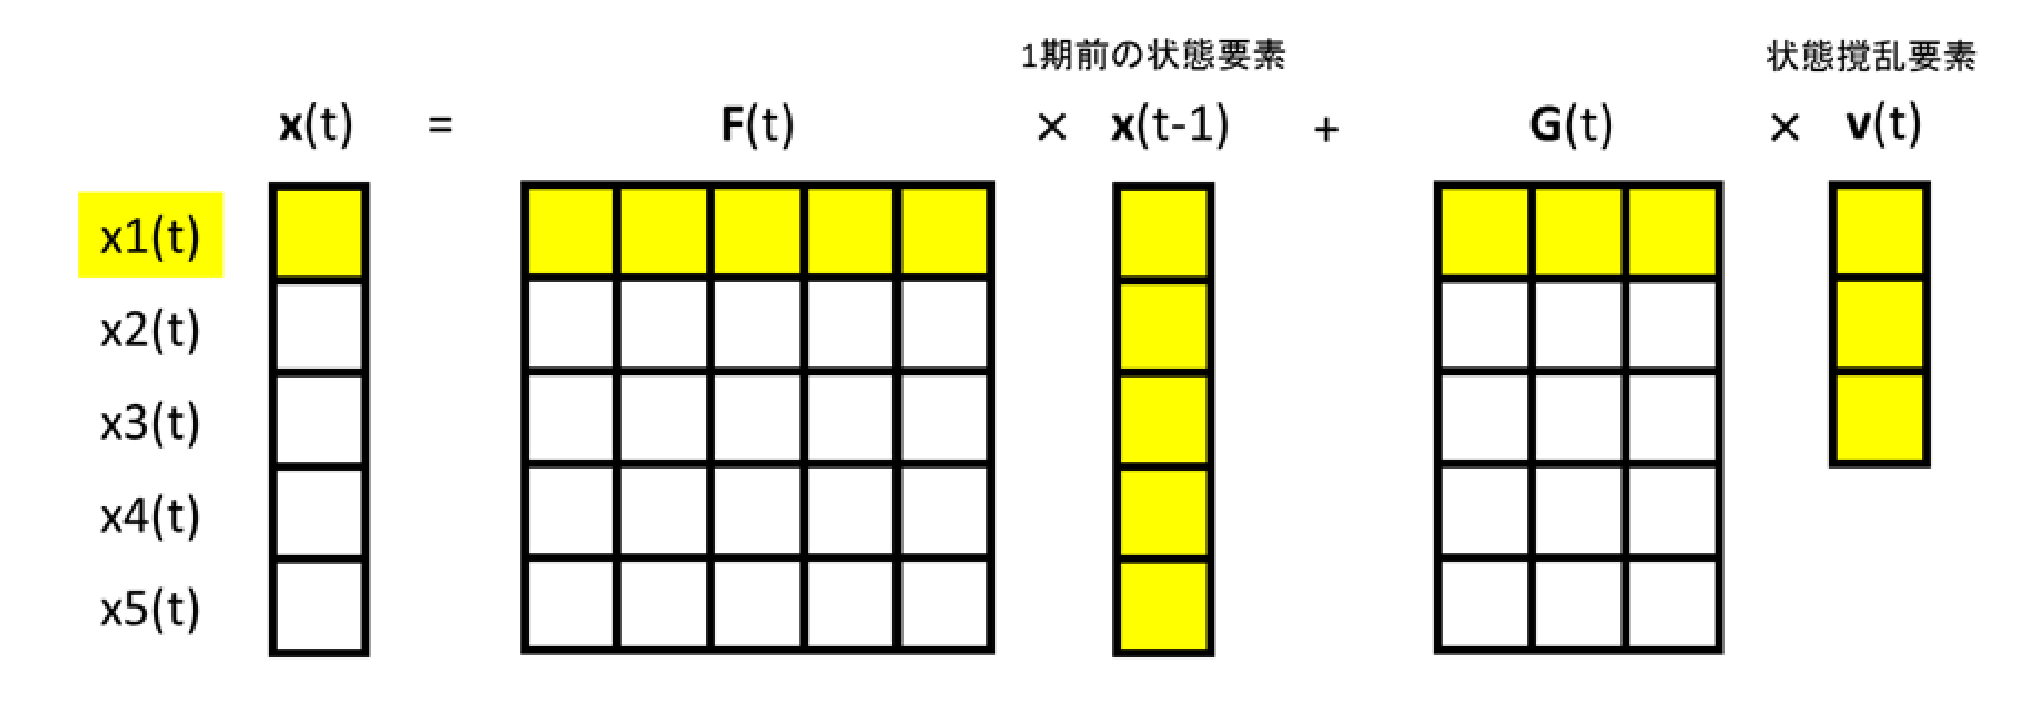

In [11]:
plt.figure(figsize=(18,6));plt.axis('off');plt.imshow(np.array(ImageGrab.grabclipboard()))

## ランダムウォーク＋ノイズモデルの状態推定

\begin{eqnarray}
    x_{t} &=& x_{t-1} + v_{t},　v～N(0,\sigma_v^2) \nonumber \\
    y_{t} &=& x_{t} + w_{t},　w～N(0,\sigma_w^2)\nonumber \\    
\end{eqnarray}

### 問題設定

分かっているものは<br>
・上記の構造<br>
・観測値y(1),...,y(t)<br>
・状態ノイズの確率密度が期待値ゼロの正規分布であること<br>
・観測ノイズが期待値ゼロの正規分布であること<br>

未知数は<br>
・状態x(1),...,x(t)<br>
・状態ノイズの分散<br>
・観測ノイズの分散<br>

目的は、<br>
・状態x(1),...,x(t)の推定

### カルマンフィルタ （予測、フィルタ）

\begin{eqnarray}
状態期待値の初期値：x_{0 mid 0}\\
状態分散の初期値：V_{0 mid 0}\\
状態ノイズ：\sigma_v^2\\
観測ノイズ：\sigma_w^2\\
を与えると、以下の逐次式により状態を推定できる。\\
これらパラメーターを最尤法により推定する場合もある。
\end{eqnarray}

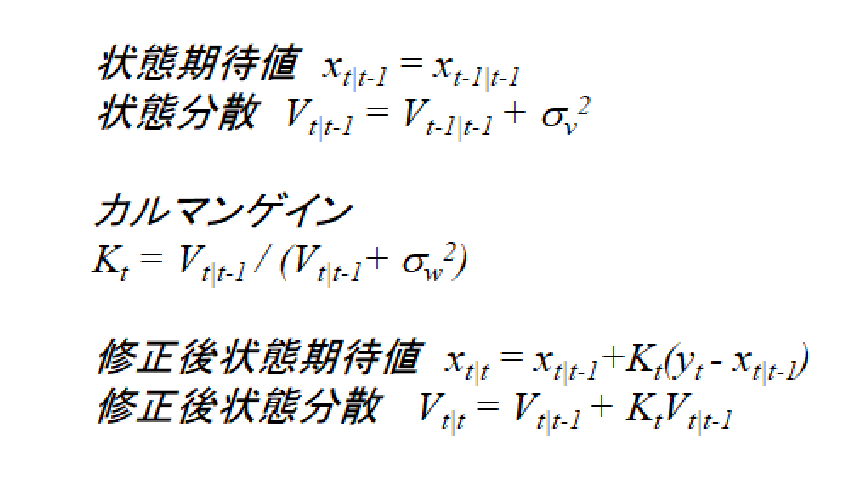

In [28]:
plt.figure(figsize=(9,4));plt.axis('off');plt.imshow(np.array(ImageGrab.grabclipboard()))

### 【実装】ランダムウォーク＋ノイズモデルの観測値データ生成

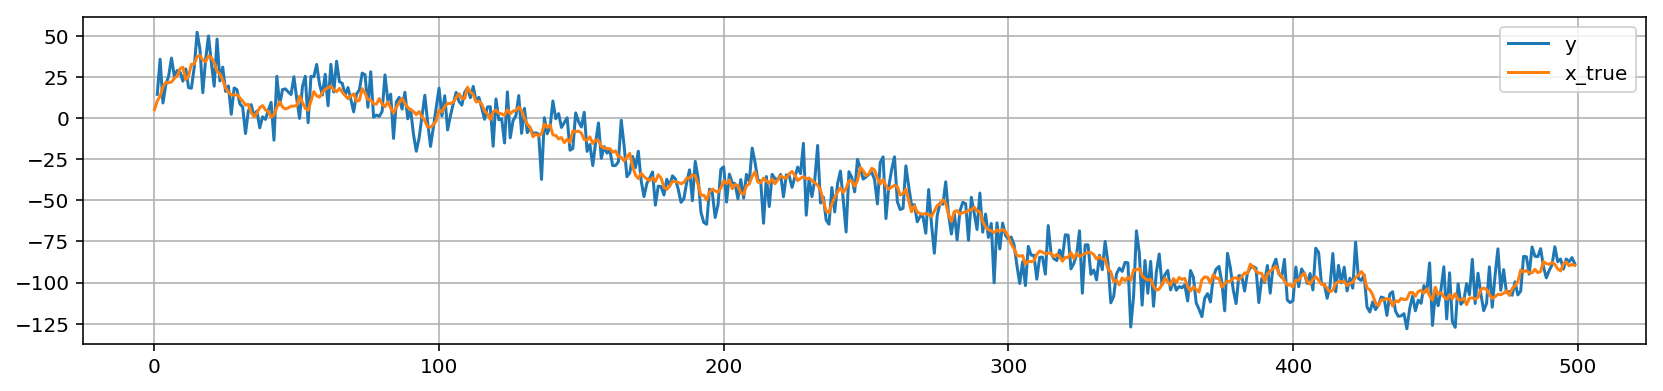

x_trueは本来はunknown


In [116]:
N = 500
x_true = np.array([np.nan]*N)
y = np.array([np.nan]*N)

x_true[0] = 5
Vv_true = 3 # 状態ノイズ
Vw_true = 10 # 観測ノイズ

np.random.seed(0)
for i in range(1,N):
    x_true[i] = x_true[i-1] + np.random.normal(0, Vv_true)
    y[i] = x[i] + np.random.normal(0, Vw_true)

plt.figure(figsize=(14, 3))
plt.plot(y,label='y')
plt.plot(x_true,label='x_true')
plt.legend()
plt.grid()
plt.show()
print('x_trueは本来はunknown')

### 【実装】状態推定（1期先予測、フィルタ）

カルマンフィルタの1期先予測＆フィルタアルゴリズムを実装する。<br>
※状態ノイズ、観測ノイズの推定は行わず、真の値をそのまま使う（本来は未知なので不可）<br>
※初期状態の確率密度パラメーターは適当に与える

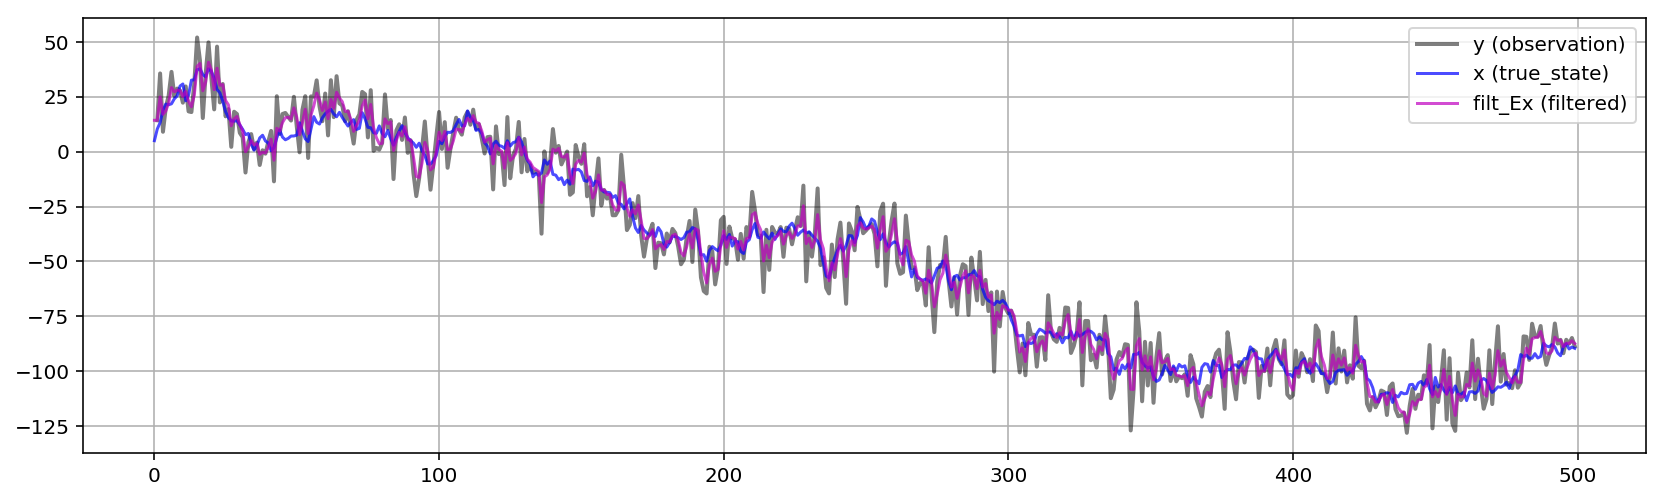

In [115]:
# 計算結果格納用アレイ ---------------------------------------------
pred_Ex = np.array([np.nan] * N) # 1期先予測 状態期待値
pred_Vx = np.array([np.nan] * N) # 1期先予測 状態分散
K = np.zeros_like(y)  # カルマンゲイン
filt_Ex = np.array([np.nan] * N) # 修正後 状態期待値
filt_Vx = np.array([np.nan] * N) # 修正後 状態分散

# 未知パラメーター、初期値 ---------------------------------------------
# estimated parameter # ここでは真の値をそのまま使う
Vv = Vv_true # 状態ノイズの分散
Vw = Vw_true # 観測ノイズの分散

# t=0 filter (initial values)
filt_Ex[0] = y[1]
filt_Vx[0] = Vv

# 1期先予測とフィルタ -----------------------------------------------
# ここからループ処理で書けるが、理解しやすいようにt=1のみループ外に書く
# t=1 predict 
pred_Ex[1] = filt_Ex[0]
pred_Vx[1] = filt_Vx[0] + Vv_2

# t=1 filter
K[1] = pred_Vx[1] / (pred_Vx[1] + Vw_2)
filt_Ex[1] = pred_Ex[1] + K[1] * (y[1] - pred_Ex[1])
filt_Vx[1] = pred_Vx[1] - K[1] * pred_Vx[1]

# 以降同様の処理をloopで  -----------------------------------------------
for i in range(2,N):
    # predict
    pred_Ex[i] = filt_Ex[i-1]
    pred_Vx[i] = filt_Vx[i-1] + Vv_2
    
    # filter
    K[i] = pred_Vx[i] / (pred_Vx[i] + Vw_2)
    filt_Ex[i] = pred_Ex[i] + K[i] * (y[i] - pred_Ex[i])
    filt_Vx[i] = pred_Vx[i] - K[i] * pred_Vx[i]

# 結果をplot -----------------------------------------------
plt.figure(2,figsize=(14, 4))
plt.plot(y, 'k', label='y (observation)', alpha=0.5, linewidth=2)
plt.plot(x, 'b', label='x (true_state)', alpha=0.7)
plt.plot(filt_Ex, 'm', label='filt_Ex (filtered)', alpha=0.7)
plt.legend()
plt.grid()
plt.show() 

### 未知パラメーターの最尤推定

#### 尤度の計算

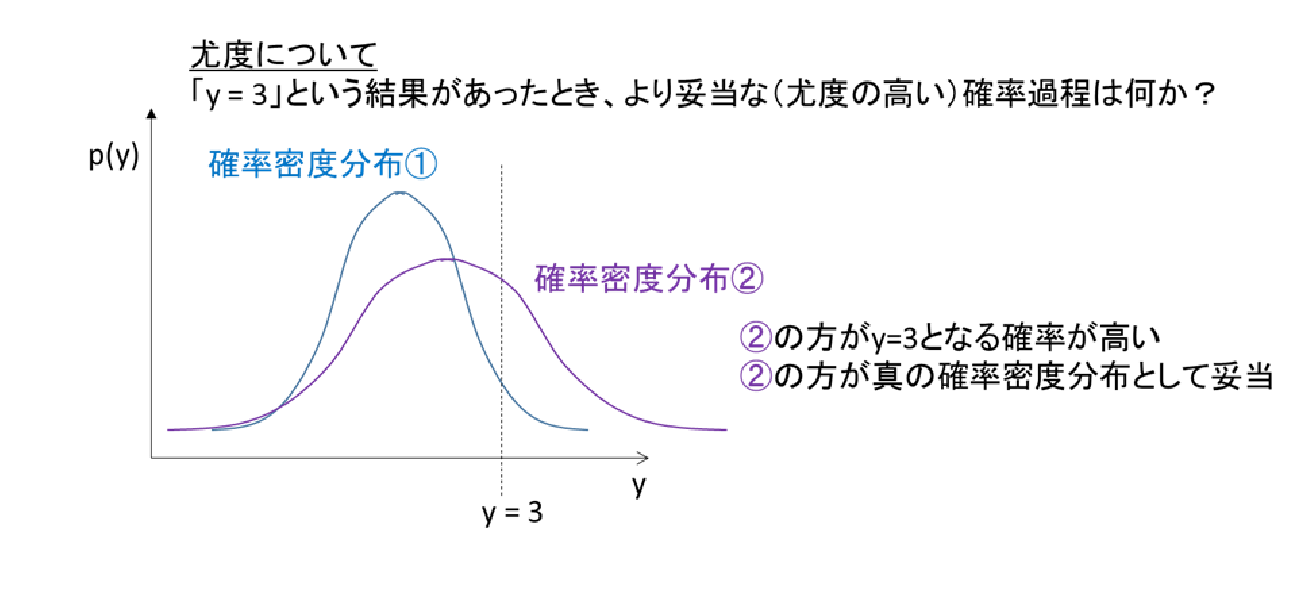

In [120]:
plt.figure(figsize=(11,6));plt.axis('off');plt.imshow(np.array(ImageGrab.grabclipboard()))

観測値yの尤度を求める<br>
※状態xの尤度も計算できるが、たぶん意味ない。パラメーターによって状態xの結果は変わるし。一番尤度高いとこだとデルタ関数になっちゃいそう。

カルマンフィルタの計算において、各時点の状態の期待値E(xt)と分散V(xt)を求めている。<br>
yt = xt + wtより、yの期待値E(yt)=E(xt)、分散はV(yt)=V(xt)+V(wt)。

\begin{eqnarray}
p(yt) = \frac{1}{2\pi\sigma_{yt}^2} \exp(-\frac{(yt-E(yt))^2}{2\sigma_{yt}^2})
\end{eqnarray}

確率密度分布p(yt)は時点によって時々刻々変わる。

#### 【実装】尤度の計算

現在のパラメーター（状態tの確率密度、状態ノイズ分散、観測ノイズ分散）<br>
における y1,...,yt の対数尤度を計算する。

In [129]:
from math import exp
from math import log
like = np.array([np.nan]*N)
lnlike = np.array([np.nan]*N)
Ey = np.array([np.nan]*N)
Vy = np.array([np.nan]*N)

# t=1について -----------------------
# ※ほんとはループ内に入れるべき コード理解しやすいのでこうしている
# yの期待値と分散
Ey[1] = filt_Ex[1]
Vy[1] = filt_Vx[1] + Vw  # 正規分布の加法定理より

# 確率密度
like[1] = 1 / np.sqrt(2*np.pi*Vy[1]) * exp(
    -(y[1]-Ey[1])**2 / 
    (2*Vy[1])
)
# 対数
lnlike[1] = log(like[1])

# t=2以降はループ処理で書く -----------------------
for i in range(2,N):
    Ey[i] = filt_Ex[i]
    Vy[i] = filt_Vx[i] + Vw
    like[i] = 1 / np.sqrt(2*np.pi*Vy[i]) * exp(
        -(y[i]-Ey[i])**2 / 
        (2*Vy[i])
    )
    lnlike[i] = log(like[i])

# 和をとる
np.sum(lnlike[1:N])
print('対数尤度:',np.sum(lnlike[1:N]))

対数尤度: -1796.51898031


#### 最尤法によるパラメーター推定

パラメーターを変えて状態推定～尤度計算までやっていき、尤度が最大のパラメーターの組を探索する。

In [130]:
# クラス化
class kalman:
    from math import exp
    from math import log
    import numpy as np
    
    def __init__(self, y):
        self.Y = y  # 観測値系列
        self.N = Y.shape[0]  # 観測値系列の長さ

    def filt(Vv, Vw):  # 推定対象のパラメーターを引数とする
        y = self.Y
        N = self.N
        
        # 計算結果格納用アレイ ---------------------------------------------
        pred_Ex = np.array([np.nan] * N) # 1期先予測 状態期待値
        pred_Vx = np.array([np.nan] * N) # 1期先予測 状態分散
        K = np.zeros_like(y)  # カルマンゲイン
        filt_Ex = np.array([np.nan] * N) # 修正後 状態期待値
        filt_Vx = np.array([np.nan] * N) # 修正後 状態分散

        # 未知パラメーター、初期値 ---------------------------------------------
        filt_Ex[0] = y[1] # 同下
        filt_Vx[0] = Vv # ここも未知パラメーターだが今回の最尤推定の対象にはしない

        # 1期先予測とフィルタ -----------------------------------------------
        for i in range(1,N):
            # predict
            pred_Ex[i] = filt_Ex[i-1]
            pred_Vx[i] = filt_Vx[i-1] + Vv_2

            # filter
            K[i] = pred_Vx[i] / (pred_Vx[i] + Vw_2)  # kalman gain
            filt_Ex[i] = pred_Ex[i] + K[i] * (y[i] - pred_Ex[i])
            filt_Vx[i] = pred_Vx[i] - K[i] * pred_Vx[i]
            
        # set result
        self.filt_Ex = filt_Ex
        self.filt_Vx = filt_Vx
        
    def calclike():
        y = self.Y
        N = self.N
        filt_Ex = self.filt_Ex
        filt_Vx = self.filt_Vx
        
        #
        like = np.array([np.nan]*N)
        lnlike = np.array([np.nan]*N)
        Ey = np.array([np.nan]*N)
        Vy = np.array([np.nan]*N)
        #
        for i in range(1,N):
            Ey[i] = filt_Ex[i]
            Vy[i] = filt_Vx[i] + Vw
            like[i] = 1 / np.sqrt(2*np.pi*Vy[i]) * exp(
                -(y[i]-Ey[i])**2 / 
                (2*Vy[i])
            )
            lnlike[i] = log(like[i])

        # 和をとる
        np.sum(lnlike[1:N])
        print('対数尤度:',np.sum(lnlike[1:N]))


In [ ]:
ins_kalman = kalman(y)
ins_kalman.filt(Vv, Vw)


\begin{eqnarray}
\bf{x_{t}} &=& F_{t} \bf{x_{t-1}} + G_{t} \bf{v_{t}} \nonumber \\
\end{eqnarray}